# TP1 Forearm movements and LQR model


* Marco Milanesi
* Andrea Campanelli



NOTE: the files `extracted_data_extended` and `two_movements.csv` have to be uploaded inside the notebook manually.



# 1. Visualizing and pre-processing the data

## Task 1
**Open the file with any text editor to see how the file is formatted. Then, write a Python script to load movement data into a list.**

In [1]:
# the file is a csv file with ; as separator
index = -1
list_movement = []
list_temp =[]
time = []
position = []
substring = "Movement"
header = '#'

with open('two_movements.csv', "r") as _file :
  for line in _file :
    if header in line:
      continue
    if substring in line:
        list_movement.append(list_temp)
        list_temp = []
    list_temp.append(line)

list_movement = list_movement[1:]
    

In [2]:
import pandas as pd

df_list = []
for j in range(0,len(list_movement)):
  for i in list_movement[j]:
    if substring in i:
      continue
    values = i.split (';')
    time.append(float(values[0]))
    position.append(float(values[1].strip("\n")))

  # Create the data set
  df=pd.DataFrame()
  # Labels
  df=pd.DataFrame(time,columns=['time'])
  # Energy Features
  df.insert(1,"Movement",position,True)
  df_list.append(df)
  time = []
  position = []

### Showing Movement 1

In [3]:
df_list[0]

,time,Movement
0,2.3712,4153.0
1,2.3873,4153.0
2,2.3912,4155.0
3,2.4072,4158.0
4,2.4112,4175.0
...,...,...
373,6.3352,18977.0
374,6.3392,18966.0
375,6.3552,18925.0
376,6.3592,18844.0


### Showing Movement 2

In [4]:
df_list[1]

,time,Movement
0,7.7872,4163.0
1,7.7912,4160.0
2,7.8072,4161.0
3,7.8112,4161.0
4,7.8272,4176.0
...,...,...
219,10.0912,18981.0
220,10.0952,18983.0
221,10.1112,18983.0
222,10.1152,18983.0


## Task 2
**If you look at the time component of the signal, you notice that the sample times are uneven.
This will cause problems, so you first need to resample the data to have equally spaced samples. Do
that.**

In order to a have equally spaced samples a discretization of $10 \,\,ms$ is used. In particular the Numpy's interp function has been employed: 


```
y = np.interp(x, time, movement)
```
where x has been redefined with `np.arrange(time[i], time[len(time)-1], 0.01)` from the initial time to the end one of the movement but equally spaced of $10 \,\,ms$. This process is then iterated for each movement.




In [5]:
from re import X
from operator import length_hint
import numpy as np
df_list_new = []
for i in range (0,len(df_list)):
  time = np.array(df_list[i]['time'])
  movement = np.array(df_list[i]['Movement'])
  x = np.arange(time[i], time[len(time)-1], 0.01)
  y = np.interp(x, time, movement)
  df=pd.DataFrame(x,columns=['time'])
  # Energy Features
  df.insert(1,"Movement",y,True)
  df_list_new.append(df)

### Showing movement 1

In [6]:
df_list_new[0]

,time,Movement
0,2.3712,4153.000
1,2.3812,4153.000
2,2.3912,4155.000
3,2.4012,4156.875
4,2.4112,4175.000
...,...,...
396,6.3312,18977.250
397,6.3412,18960.875
398,6.3512,18935.250
399,6.3612,18837.625


### Showing Movement 2

In [7]:
df_list_new[1]

,time,Movement
0,7.7912,4160.000000
1,7.8012,4160.625000
2,7.8112,4161.000000
3,7.8212,4170.375000
4,7.8312,4282.000000
...,...,...
230,10.0912,18981.000000
231,10.1012,18983.000000
232,10.1112,18983.000000
233,10.1212,18981.881988


## Task 3
You can now drop the time signal, which is not informative anymore. Now, compute the
average of the two movements that you extracted.

The two movements don’t have the same length, what should you do?

After dropping the column of the dataframe using `drop('time', inplace=True, axis=1)`, we compute the average of the two movements. Since they don't have the same lenght, we completed the shorter vector up to the lenght of the other with his final value. This is because the movement finishes and there are no changements anymore.

The figures below shows the two movements an the average computed.


In [8]:
for i in df_list_new:
  i.drop('time', inplace=True, axis=1)

C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\710293398.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_list_new[1]['Movement'][i] = df_list_new[1]['Movement'][len_mov_2-1]
C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\710293

Length Movement 1: 401
Length Movement 2: 235
Length Movement 2 reshaped: 401


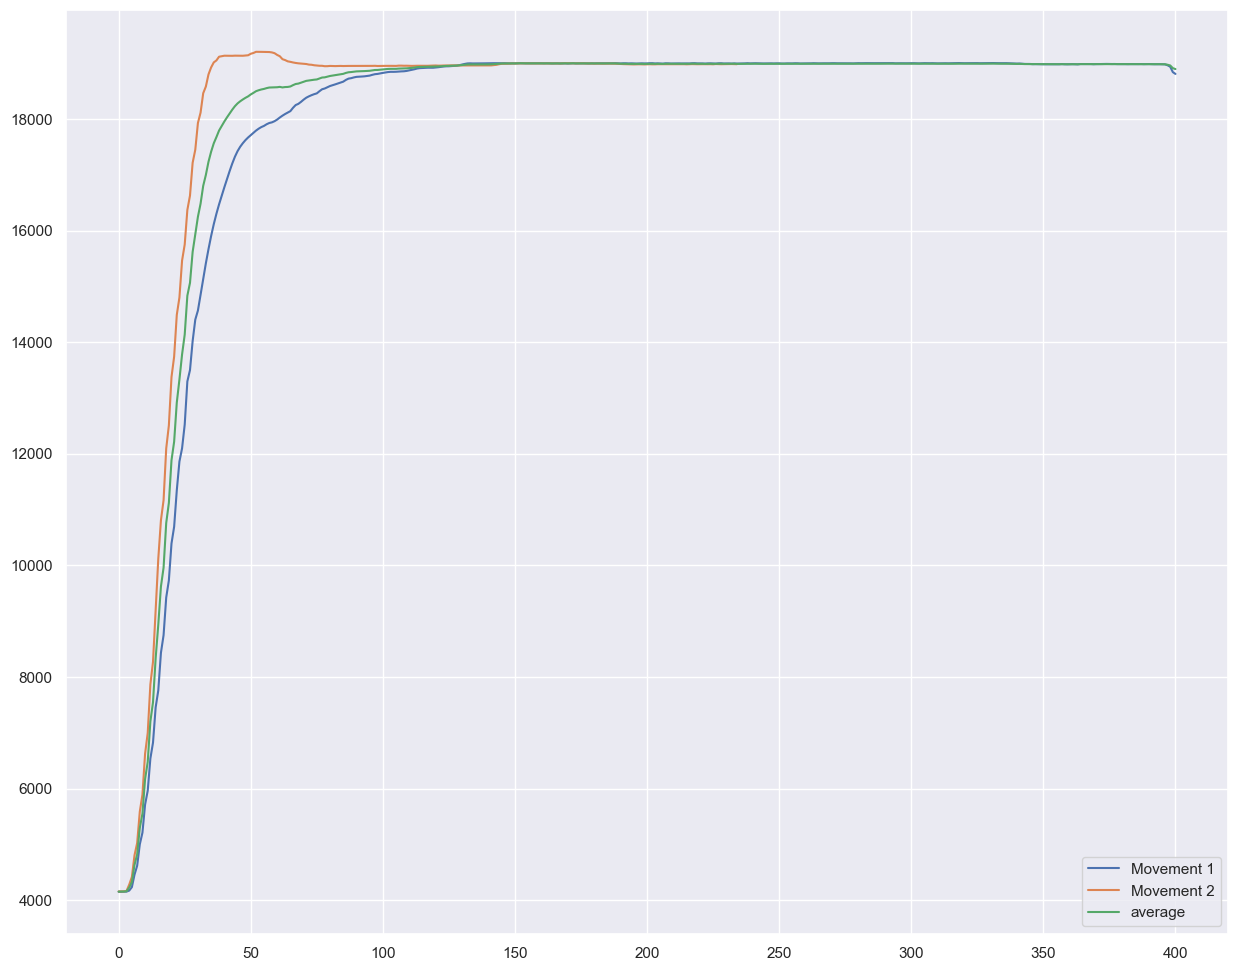

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

average = []
import statistics
val_max = max(len(df_list_new[0]), len(df_list_new[1]))
len_mov_2 = len(df_list_new[1])
for i in range(0, val_max):
  if i < len(df_list_new[1]):
    average.append(statistics.mean([float(df_list_new[0]['Movement'][i]), float(df_list_new[1]['Movement'][i])]))
  else:
    average.append(statistics.mean([float(df_list_new[0]['Movement'][i]), float(df_list_new[1]['Movement'][len_mov_2-1])]))
    df_list_new[1]['Movement'][i] = df_list_new[1]['Movement'][len_mov_2-1]
print("Length Movement 1: " + str(len(df_list_new[0])) + "\nLength Movement 2: "+ str(len(df_list_new[1])) + "\nLength Movement 2 reshaped: "+ str(len(average)))


sns.set(rc={'figure.figsize':(15,12)})
plt.plot( df_list_new[0], label='Movement 1')
plt.plot( df_list_new[1], label='Movement 2')
plt.plot( average, label = 'average')
plt.legend()
plt.show()


## Task 4
Load this file, visualize, and briefly describe the dataset. Also display the average trajectory
for each condition.


The dataset loaded is a dictionary composed by five movements. In each movements different trajectories are present. For example, the first movement contains 80 trajectories and so  80 vectors 68 values long. All these trajectories of the first movement are displayed in the last figure. 
Then the average trajectory of each movement is displayed in the first five figures. 



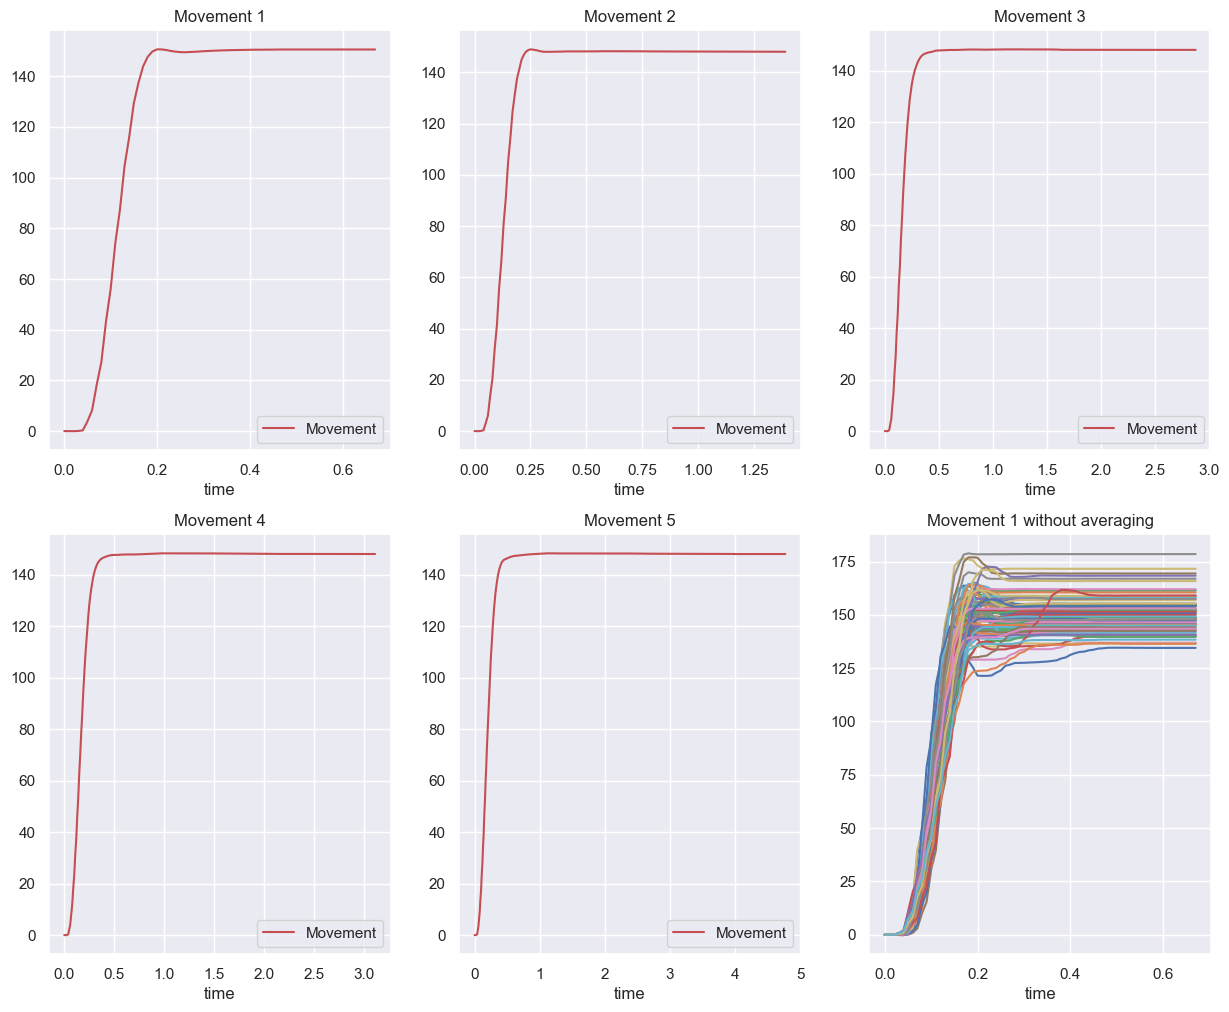

In [10]:
# Pickle
average = []
import pickle
with open ("extracted_data_extended", "rb") as handle :
  dataset = pickle.load(handle)
dataset = dict(sorted(dataset.items(), key=lambda item: item[0],reverse=False))
names = list(dataset.keys())
values = list(dataset.values())

sns.set(rc={'figure.figsize':(15,12)})
average_trajectories = [None] * len(names)
fig, axs = plt.subplots(nrows=2, ncols=3)
for j in range(len(names)):
  [row, column] = np.shape(values[j])
  average = 0
  for i in range(row):
    average += values[j][i]
  average_trajectories[j] = average/row
  plt.subplot(2,3,j+1) 
  time = np.arange(0,(column)*0.01,0.01)
  plt.plot(time, average_trajectories[j], 'r-', label='Movement')
  plt.title('Movement ' + names[j])
  plt.xlabel('time')
  plt.legend()

plt.subplot(2,3,6)
[row, column] = np.shape(values[0])
time = np.arange(0,(column)*0.01,0.01)
for j in range(row):
  plt.plot(time, values[0][j], label='Movement')

plt.title('Movement ' + names[0] + ' without averaging')
plt.xlabel('time')
plt.show()

## Task 5
**For each condition, determine by the eye when the average movement ends (i.e., when it levels off)**

All the average movements end around 150.

Movement 1: 0.25
Movement 2: 0.3
Movement 3: 0.5
Movement 4: 0.6
Movement 5: 1.0

# 2. Single-joint forearm dynamics

## Task 6
**Put the system in the general form of a linear system.**


$$
I \ddot{\theta} - b \dot{\theta} = \tau
$$

$$
\ddot{\theta} = \frac{\tau}{I} - \frac{b}{I} \dot{\theta}
$$

$$
x = \begin{bmatrix}
\theta\\ 
\dot{\theta}
\end{bmatrix} 
$$


$$
\ddot{x} = \begin{bmatrix}
\dot{\theta}\\ 
\ddot{\theta}
\end{bmatrix}
$$

$$
\dot{x} = Fx + G \tau
$$

$$
\ddot{x} = \begin{bmatrix}
\dot{\theta}\\ 
\ddot{\theta}
\end{bmatrix} = \begin{bmatrix}
0 & 1\\ 
0 & -\frac{b}{I}
\end{bmatrix}\begin{bmatrix}
\theta\\ 
\dot{\theta}
\end{bmatrix}+\begin{bmatrix}
0\\ 
\frac{1}{I}
\end{bmatrix}\tau
$$

## Task 7

**Use the Euler forward approximation 
to find the equivalents of F and
G in discrete time.**

$$
\dot{x}(t) = \frac{x[(k+1)T]-x[kt]}{\Delta T} = F x[kT] + Gu[kT]
$$

$$
x[(k+1)T] = x[kT] + F \Delta Tx[kT]+\Delta TGu[kT] = \\ = x[kT](I + F \Delta T) + \Delta T G u[kT]
$$

$$
A = I + F \Delta T \\
B = \Delta T G
$$



# 4. LQR and Real Data

## Task 9
**Write a function that “solves” the LQR (i.e., computes P, K and u) for any A, B, C, Q, QF , R.**

The function below solves the LQR given the initial state $x_0, Q, R, A, B, C$ and number of iterations $N$. It outputs $P, K,$ the commands $u$, the states $x$, the observations $y$ and the $J$ value.

In [11]:
def lqr(x_0, Q, R, A, B, C, N):
    P = [None] * (N + 1)    
    Qf = Q
    P[N] = Qf
    for k in range(N-1, 0, -1):
      P[k] = Q + A.T @ P[k+1] @ A - A.T @ P[k+1] @ B @ np.linalg.inv(R + B.T @ P[k+1] @ B) @ B.T @ P[k+1] @ A
    K = [None] * N
    u = [None] * N
    x = [None] * (N+1)
    y = [None] * N
    x[0] = x_0
    J = 0
    for k in range(N):
      K[k] = -np.linalg.inv(R + B.T @ P[k+1] @ B) @ B.T @ P[k+1] @ A
      u[k] = K[k] @ x[k]
      x[k+1] = A@x[k] + B@u[k]
      y[k]= float(C@x[k])
      J += (x[k].T@Q@x[k]+u[k].T@R@u[k])
    J += x[N].T@Qf@x[N]
    return P, K, u, x, y, J

## Task 10


**Simulate trajectories that result from an optimal control law determined by the LQR.** **The simulation should return x, y, u and J. What is y? Plot y and u as a function of time.**


The figures below show the results from the control law determined by the LQR from the startin state x_0 = [-0.15; 0], in particular the states x (position and velocity), the command u and the observation y. The y is the observation; in this case being C=[1, 0], the y is the first value of the state and so the position of the movement.

In [12]:
A = np.array([[1, 0.01], [0, 1-0.01*0.2/0.25]])
B = np.array([[0], [0.01/0.25]])
C = np.array([[1, 0]])
N = 100
Q = C.T @ C
Qf = Q
rho = 0.001
R = rho * np.eye(1)
Qf = Q
x_0 = np.array([[-0.15],[0]]).reshape(2,1)
P, K, u, x, y, J = lqr(x_0, Q, R, A, B, C, N)

C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\139716191.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[k]= float(C@x[k])


C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\3879587930.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pos.append(float(i[0]))
C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\3879587930.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vel.append(float(i[1]))
C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\3879587930.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u_list.append(float(i))


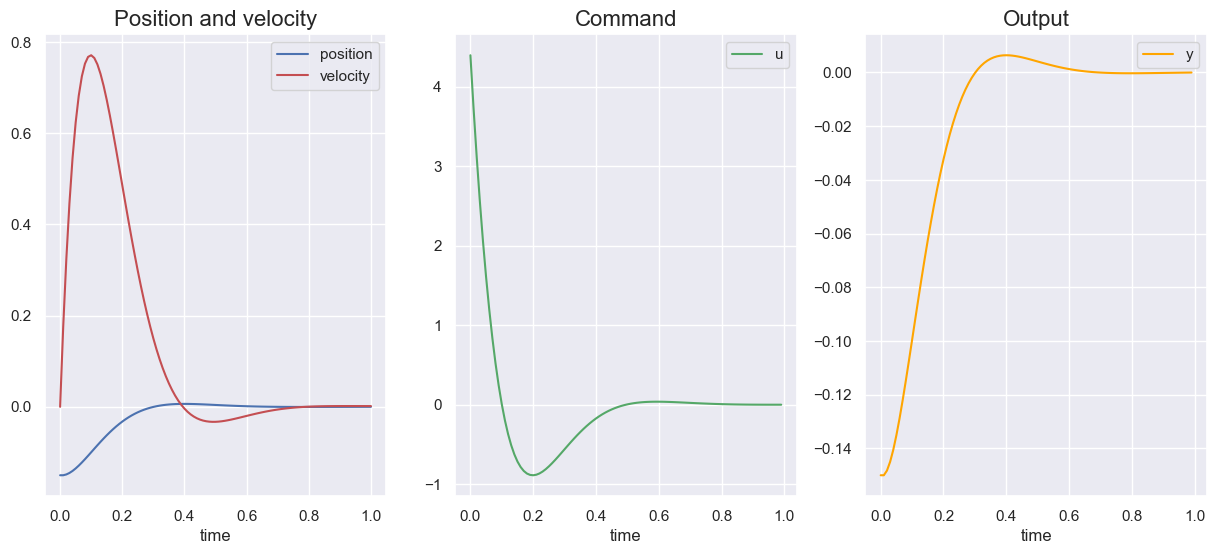

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
time = np.arange(0,(N+1)*0.01,0.01)
pos = []
vel = []
for i in x:
  pos.append(float(i[0]))
  vel.append(float(i[1]))
sns.set(rc={'figure.figsize':(15,6)})
plt.subplot(1,3,1)
plt.plot(time, pos, 'b-', label='position')
plt.plot(time, vel, 'r-', label='velocity')
plt.title('Position and velocity', fontsize=16)
plt.xlabel('time')
plt.legend()
time = np.arange(0,(N)*0.01,0.01)
u_list = []
for i in u:
  u_list.append(float(i))
plt.subplot(1,3,2)
plt.plot(time, u_list, 'g-', label='u')
plt.title('Command', fontsize=16)
plt.xlabel('time')
plt.legend()
plt.subplot(1,3,3)
y = [float(y) for y in y]
plt.plot(time, y,'orange',label='y')
plt.title('Output', fontsize=16)
plt.xlabel('time')
plt.legend()
plt.show()

## Task 11
**Try out with multiple values of ρ and compare. Comment on the differences between solutions.**

We try different values of ρ=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1] in order to study its influence on the manipulated variable u and the position observed y. By increasing the value of ρ, the values of the manipulated variable decrease and it means that the system receives less effort. Consequently the position observed reaches the reference zero in more time. 

C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\139716191.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[k]= float(C@x[k])
C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\3767917361.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u = [float(u) for u in u]


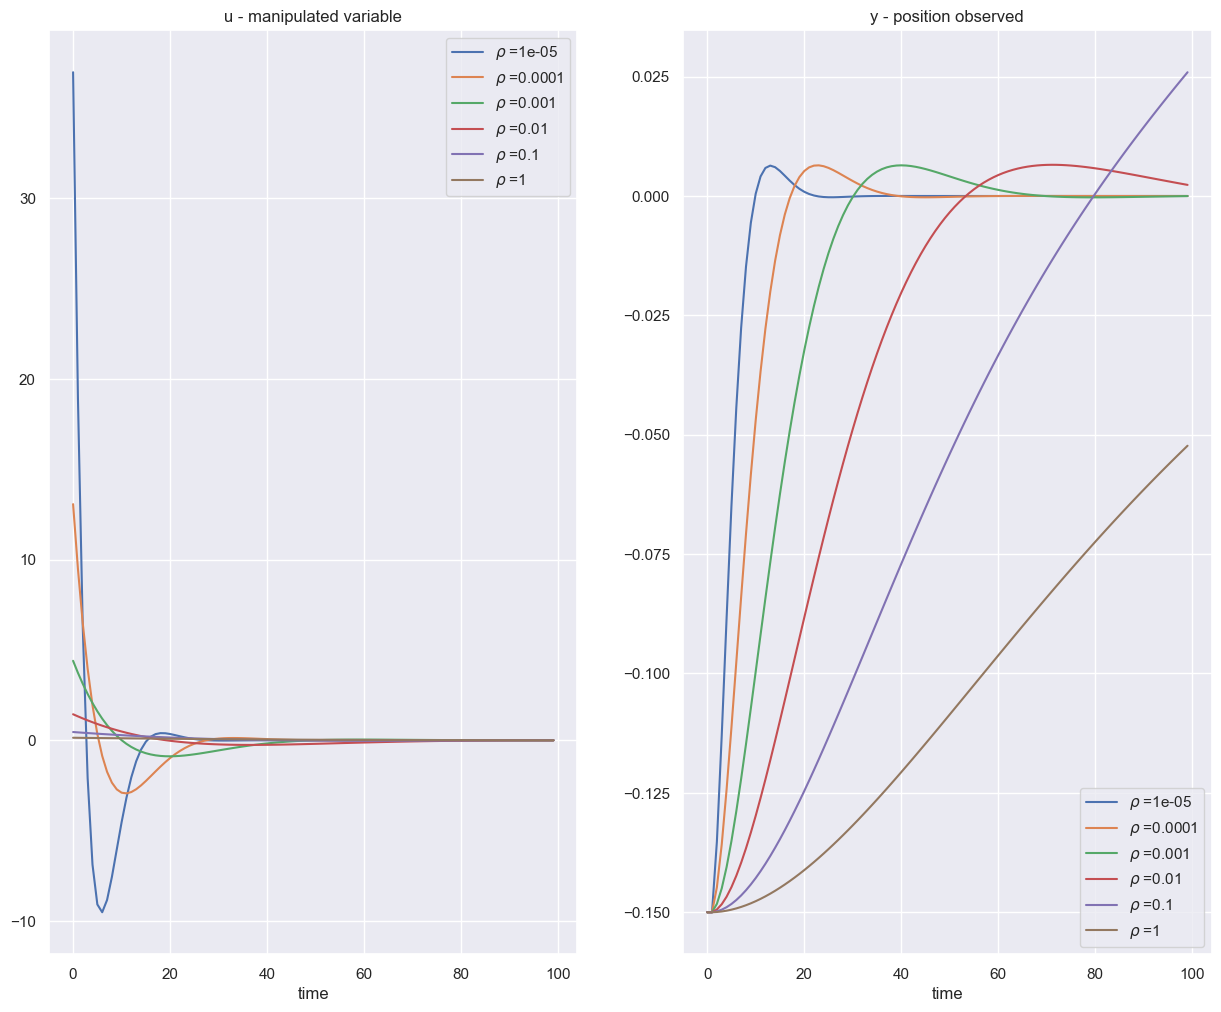

In [14]:
rho = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
sns.set(rc={'figure.figsize':(15,12)})
index = 1
for i in rho:
  R = i * np.eye(1)
  _, _, u, x, y, _ = lqr(x_0, Q, R, A, B, C, N)
  u = [float(u) for u in u]
  y = [float(y) for y in y]
  plt.subplot(1,2,1)
  plt.title('u - manipulated variable')
  plt.xlabel('time')
  plt.plot(list(range(len(u))), u , label=r'$\rho$ =' + str(i))
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(list(range(len(y))), y, label=r'$\rho$ =' + str(i))
  plt.title('y - position observed')
  plt.xlabel('time')
  plt.legend()
plt.show()

## Task 12
**Now, use the 5 average trajectories from the dataset, and determine ρ for each condition,
by finding the value of ρ that produces a trajectory that best matches the average trajectory of that
condition.**

We create a function $f$ depent on $\rho$ that outputs the norm of the difference between the average trajectory of a known movement and the observation result from the lqr control. 
For each movement of the dataset we optimize this function; the results are shown below with the optimal $\rho$ and the RMSE (root mean square error) obtained.

In [17]:
def f(rho):
  R = rho * np.eye(1)
  x_0 = np.array([average_trajectories[j][0]-average_trajectories[j][column-1],0])
  x_f = average_trajectories[j][column-1]
  ve = average_trajectories[j] - np.full((1, column), x_f)
  _, _, _, _, y, _ = lqr(x_0, Q, R, A, B, C, column)
  
  return np.linalg.norm(y-ve)

C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\139716191.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[k]= float(C@x[k])
C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\139716191.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[k]= float(C@x[k])
C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\139716191.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[k]= float(C@x[k])
C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\2024069865.py:28: De

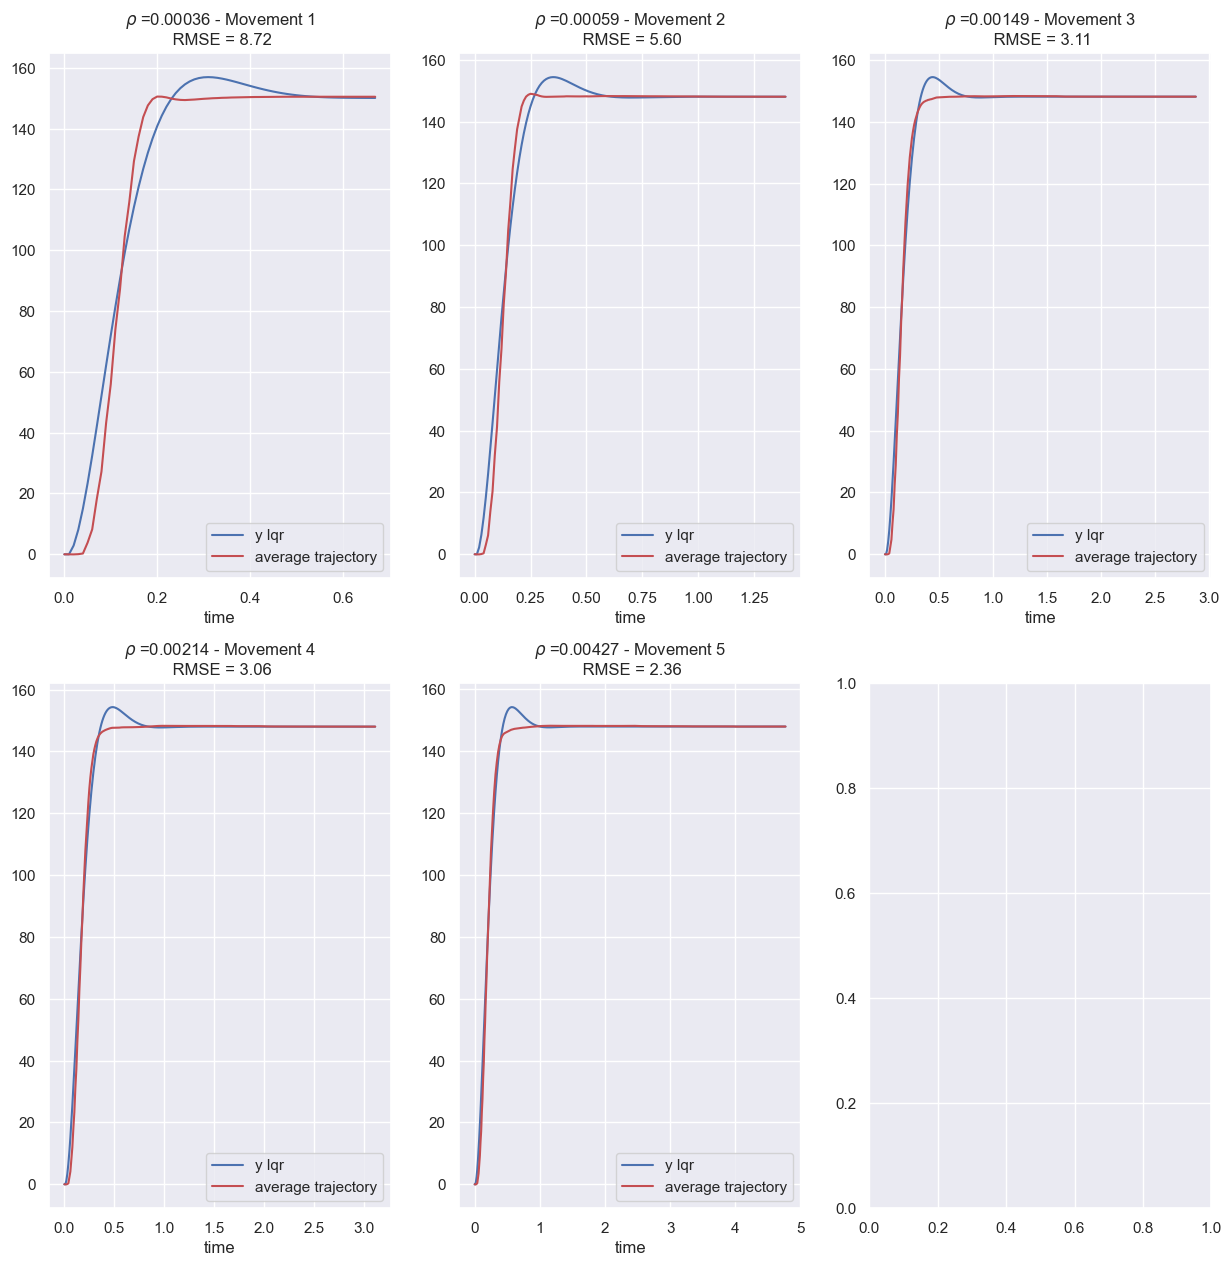

In [18]:
from scipy import optimize
from sklearn.metrics import mean_squared_error
from math import sqrt

sns.set(rc={'figure.figsize':(15,15)})
k_list = []
rho_list = []

fig, axs = plt.subplots(nrows=2, ncols=3)
for j in range(len(names)):
  [row, column] = np.shape(values[j])
  sol = optimize.minimize(f, 0.1)
  rho = sol.x
  rho_list.append(rho)
  x_f = average_trajectories[j][column-1]
  R = rho * np.eye(1)
  x_0 = np.array([average_trajectories[j][0]-average_trajectories[j][column-1],0])
  _, K, _, _, y, _ = lqr(x_0, Q, R, A, B, C, column)
  k_list.append(K)
  y = [float(y) for y in y]
  y = y + np.full((1, column), x_f)
  RMSE = sqrt(mean_squared_error(np.array(average_trajectories[j]),y[0]))
  RMSE_text = f'{float(RMSE):.2f}'
  plt.subplot(2,3,j+1) 
  time = np.arange(0,(column)*0.01,0.01)
  plt.plot(time, y[0], 'b-', label='y lqr')
  plt.plot(time, average_trajectories[j],'r-', label='average trajectory')
  rho_text = f'{float(rho):.5f}'
  plt.title(r'$\rho$ =' + rho_text + ' - Movement ' + str(j+1) + '\n RMSE = ' + RMSE_text)
  plt.xlabel('time')
  plt.legend()

## Task 13
**Visualize the fitted trajectories on top of the average trajectories. How good is the fit? You
can also play with values of Q and QF , and see if you can get better fits.**

The fit obtained before is good but it doesn't overlap perfectly. Probably we should cut most of the final part (convergence) in order to obtain better fits.
In a similar way as before, we optimize the value of Q given the ρ found before. In fact we create a new f function that returns the norm of the difference between the average trajectory and the observation result from the lqr control depending on Q.
Being Q a matrix, we convert it in a vector in order to make the optimizer function works, and then we converte it again in a matrix. The figures below show the results the comparison between the known trajectory and the optimal solution found for each movement. It is also reported the optimal value of Q and the RMSE obatained.

The results obtained are similar to the previous one, the RMSE are almost the same and the change between the two is very slight. Even with the optimal value of Q, the results don't improve sharply and so by changing this value we can not get much better fits.

In [19]:
def f(Q):
  Q = [[Q[0], Q[1]],[Q[2], Q[3]]]
  x_0 = np.array([average_trajectories[j][0]-average_trajectories[j][column-1],0])
  x_f = average_trajectories[j][column-1]
  average_shifted = average_trajectories[j] - np.full((1, column), x_f)
  _, _, _, _, y, _ = lqr(x_0, Q, R, A, B, C, column)
  
  return np.linalg.norm(y-average_shifted)

ValueError: 'x0' must only have one dimension.

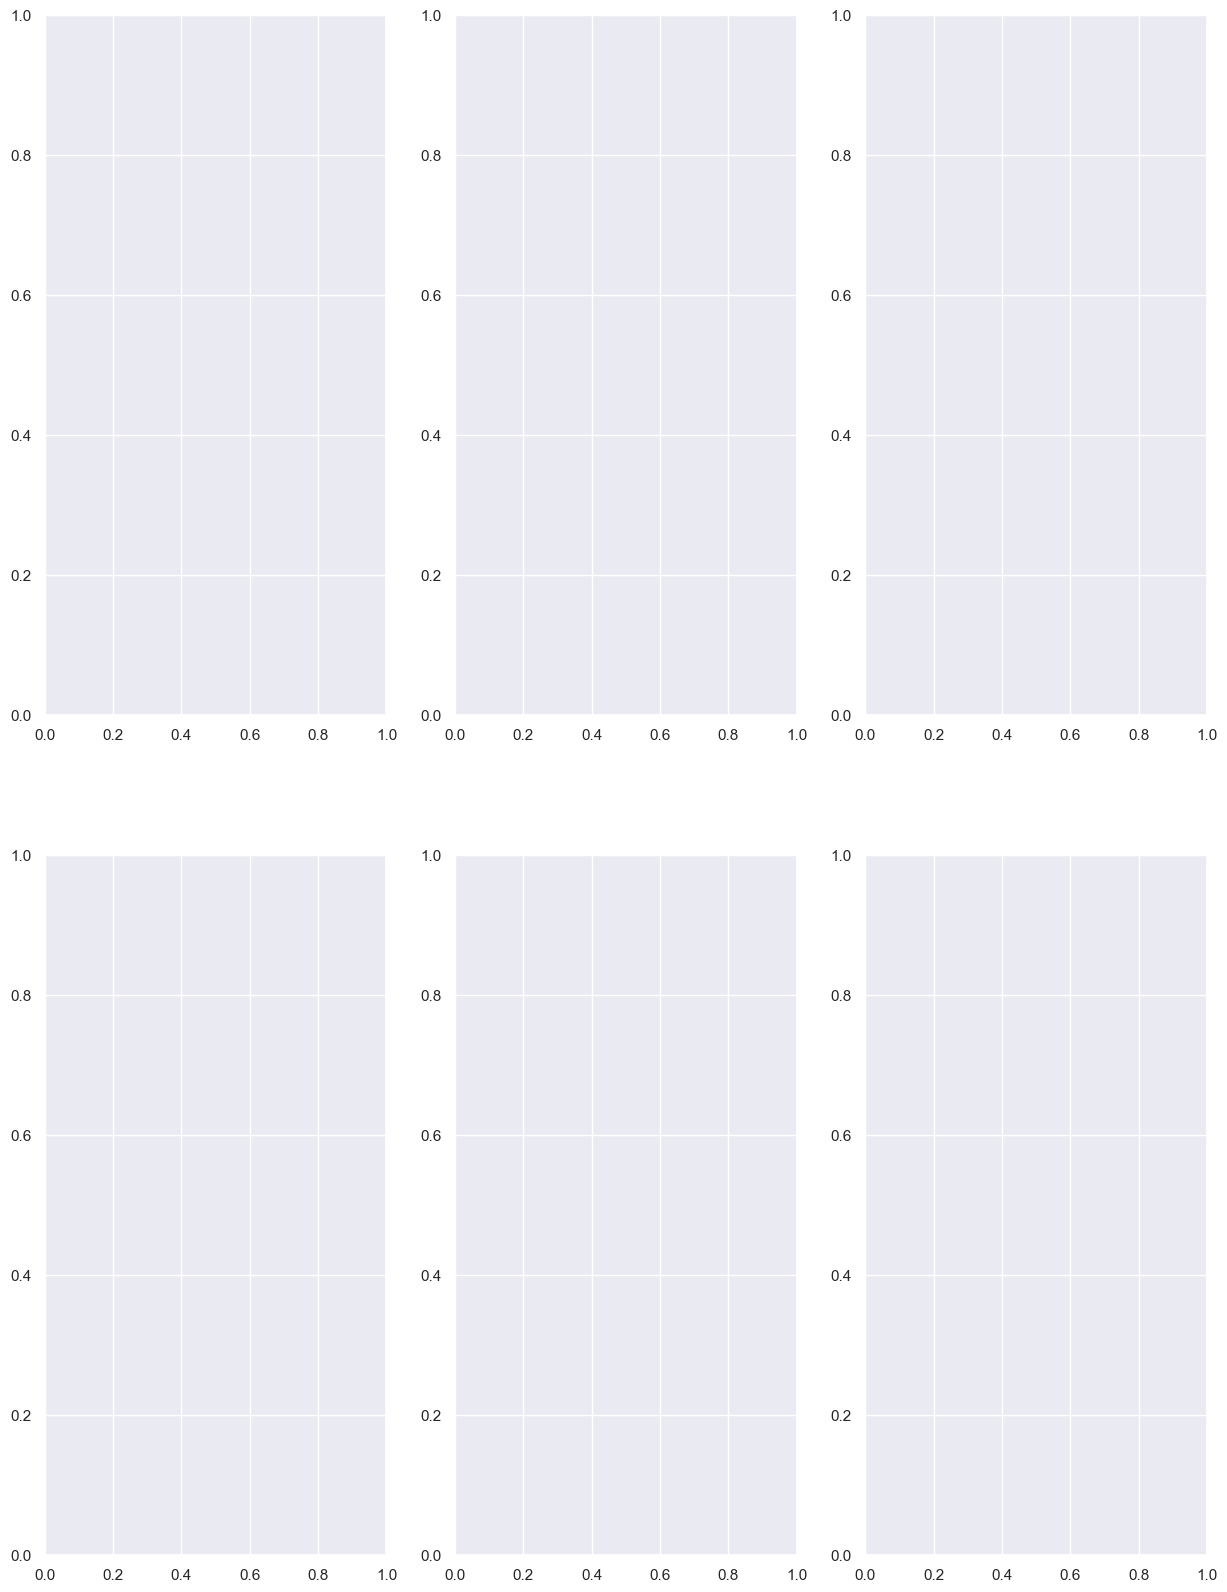

In [20]:
sns.set(rc={'figure.figsize':(15,20)})

fig, axs = plt.subplots(nrows=2, ncols=3)
for j in range(len(names)):
  [row, column] = np.shape(values[j])
  rho = rho_list[j]
  R = rho * np.eye(1)
  Q_0 = C.T @ C
  sol = optimize.minimize(f, Q_0)
  Q = sol.x
  Q = [[Q[0], Q[1]],[Q[2], Q[3]]]
  x_f = average_trajectories[j][column-1]
  x_0 = np.array([average_trajectories[j][0]-average_trajectories[j][column-1],0])
  _, _, _, _, y, _ = lqr(x_0, Q, R, A, B, C, column)
  y = [float(y) for y in y]
  y = y + np.full((1, column), x_f)
  RMSE = sqrt(mean_squared_error(np.array(average_trajectories[j]),y[0]))
  RMSE_text = f'{float(RMSE):.2f}'
  plt.subplot(2,3,j+1) 
  time = np.arange(0,(column)*0.01,0.01)
  plt.plot(time, y[0], 'b-', label='y lqr')
  plt.plot(time, average_trajectories[j],'r-', label='average trajectory')
  Q_text1 = f'{float(Q[0][0]):.2f}'
  Q_text2 = f'{float(Q[0][1]):.2f}'
  Q_text3 = f'{float(Q[1][0]):.2f}'
  Q_text4 = f'{float(Q[1][1]):.2f}'
  plt.title('Q = [' + Q_text1 +' , '+Q_text2 + '\n      ' + Q_text3 +' , '+Q_text4 + ']' + '\nMovement ' + str(j+1) + '\n RMSE = ' + RMSE_text)
  plt.xlabel('time')
  plt.legend()

# 5. Bonus

## Task 14

**Plot the obtained gains. What do you notice? Change values of Qf to see if your observation
holds. What would happen if we picked N → ∞?**

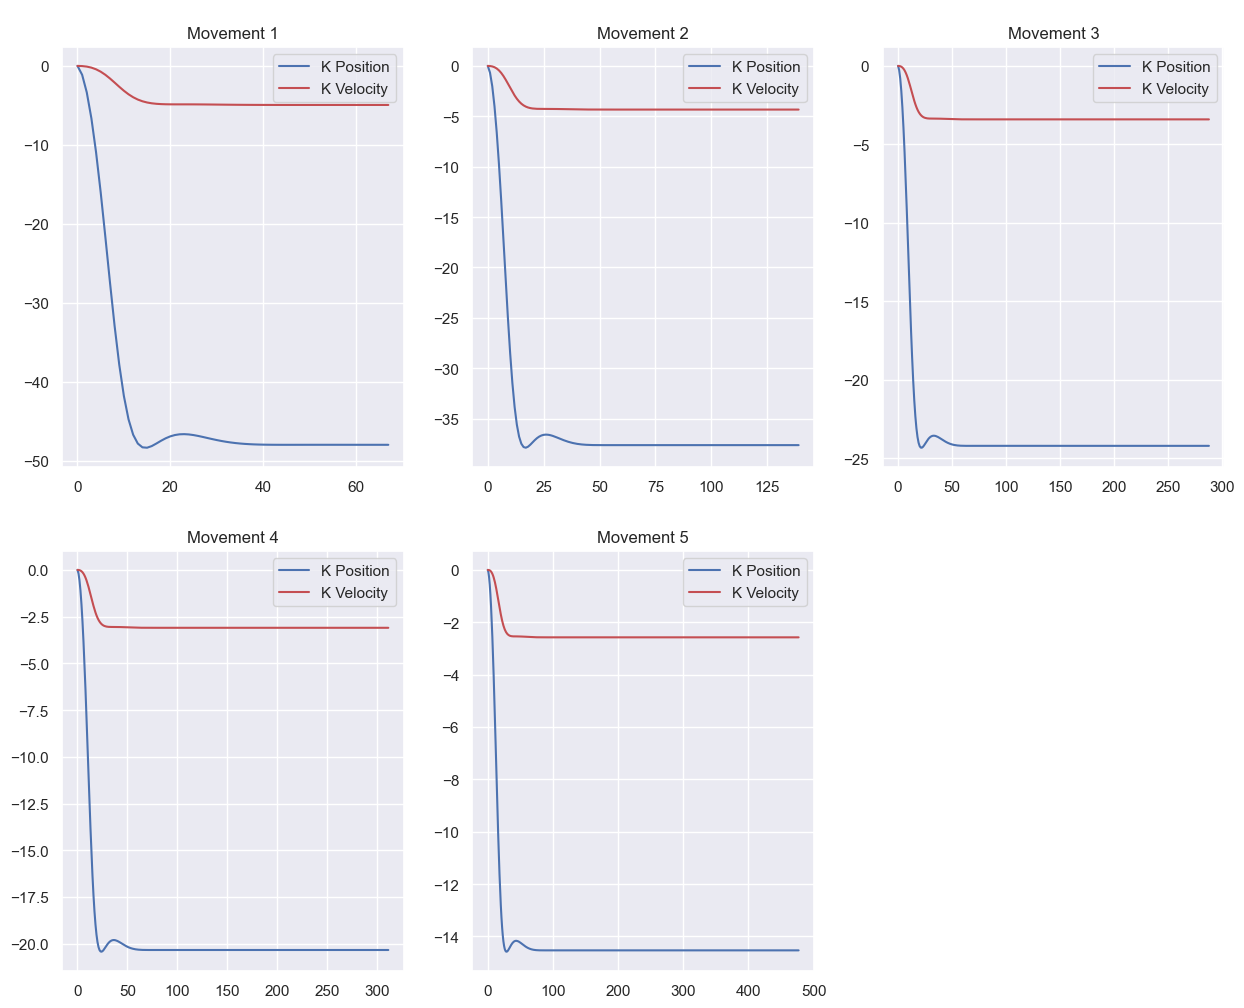

In [21]:
sns.set(rc={'figure.figsize':(15,12)})
index = 1
pos = []
vel = []
for i in k_list:
  for j in i:
    pos.append(j[0][0])
    vel.append(j[0][1])
  pos = np.flip(pos)
  vel = np.flip(vel)
  plt.subplot(2,3,index) 
  plt.plot(pos, 'b-', label='K Position')
  plt.plot(vel,'r-', label='K Velocity')
  plt.legend()
  plt.title('\nMovement ' + str(index))
  
  index += 1
  pos=[]
  vel=[]

The values of K (position and velocity) start from zero and then converge to a value in all the cases. The reference values reached are the optimal values of K.


C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\139716191.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[k]= float(C@x[k])


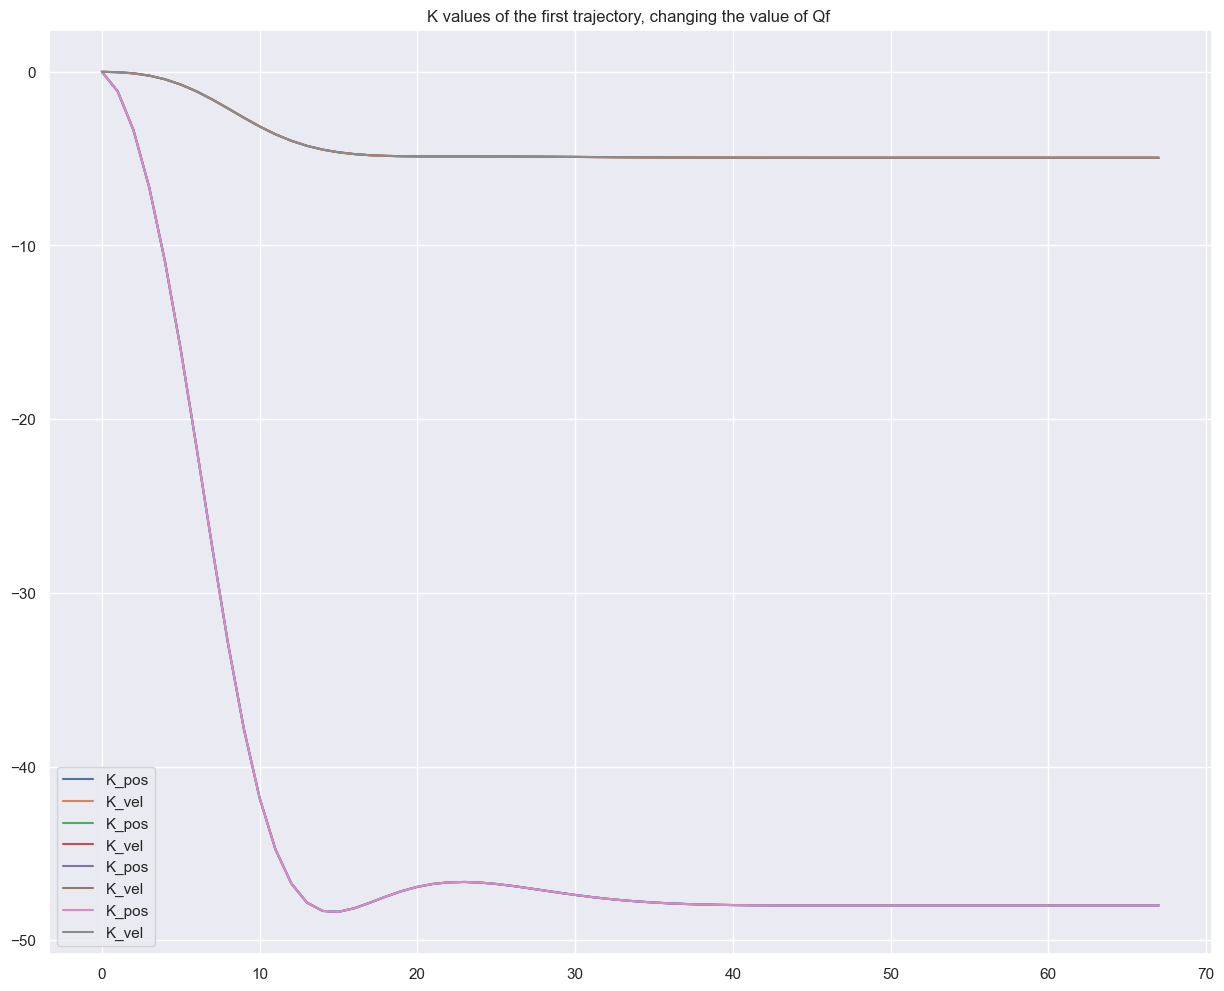

In [22]:
sns.set(rc={'figure.figsize':(15,12)})

for i in range(1,5):
  K_pos = []
  K_vel = []
  random1 = np.random.rand(i)
  random2 = np.random.rand(i)
  C = np.array([[random1[0], random2[0]]])
  Q = C.T @ C
  [row, column] = np.shape(values[0])
  rho = rho_list[0]
  x_f = average_trajectories[0][column-1]
  x_0 = np.array([average_trajectories[0][0]-average_trajectories[0][column-1],0])
  _, K, _, _, y, _ = lqr(x_0, Q, R, A, B, C, column)
  
  for j in k_list[0]:
     K_pos.append(j[0][0])
     K_vel.append(j[0][1])

  K_pos = np.flip(K_pos)
  K_vel = np.flip(K_vel)
  
  plt.plot(range(len(K_pos)),K_pos, label='K_pos')
  plt.plot(range(len(K_pos)),K_vel, label='K_vel')
  plt.title('K values of the first trajectory, changing the value of Qf ')
  plt.legend()

By changing randomly the value of Qf, the trend of the K doesn't change and they all overlap, as it can be seen in the figure above.
If we pick a value of N→∞, the trend would be the same as the previous shown: it will start at zero and then it will converge to the same value.

## Task 15

The dare function has been employed and then verified. 

In [198]:
pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
A = np.array([[1, 0.01], [0, 1-0.01*0.2/0.25]])
B = np.array([[0], [0.01/0.25]])
C = np.array([[1, 0]])
N = 100
Q = C.T @ C
Qf = Q
rho = 0.001
R = rho * np.eye(1)
Q = C.T @ C
Qf = Q
x_0 = np.array([[-0.15],[0]]).reshape(2,1)

In [24]:
from control.matlab import dare

def LQR_dare(x_0, Q, R, A, B, C, N):

    Pss = dare(A, B, Q, R)
    Pss = np.array(Pss[0])
    Kss = -np.linalg.inv(R + B.T @ Pss @ B) @ B.T @ Pss @ A

    x = [None] * (N + 1)
    x[0] = x_0
    y = [None] * N 
    u = [None] * N
    J = 0
    for k in range(0, N):
        u[k] = Kss @ x[k]
        y[k] = C @ x[k]
        x[k + 1] = A @ x[k] + B @ u[k]
        J += (x[k].T @ Q @ x[k]) + (u[k].T @ R @ u[k])
    
    J += x[N].T @ Qf @ x[N]

    return x, y, u, J, Kss, Pss

In [26]:
_, _, _, _, _, Pss = LQR_dare(x_0, Q, R, A, B, C, column)
P, _, _, _, _, _ = lqr(x_0, Q, R, A, B, C, column)

C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\139716191.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[k]= float(C@x[k])


In [27]:
index = 0
for i in P[1:]:
  index +=1
  if (i-Pss<1e-7).all():
    print('P_{k+1} = ')
    print(P[index+1])
    print('\nP_{k} = ')
    print(P[index])
    print('\nP_{ss} = ')
    print(Pss)
    print('\nP_{k+1} = P_{ss} = P_{k} after: ' +str(index) + ' iterations')
    break

P_{k+1} = 
[[13.58362688  0.85279577]
 [ 0.85279577  0.10232615]]

P_{k} = 
[[13.58371697  0.85279217]
 [ 0.85279217  0.10232629]]

P_{ss} = 
[[13.58499985  0.85283611]
 [ 0.85283611  0.10232942]]

P_{k+1} = P_{ss} = P_{k} after: 1 iterations


## Task 16

**Implement the infinite horizon solution, simulate trajectories, compare with the finite horizon
solution and comment.**

We compare the trajectories given, the ones found with LQR  finite horizon and with LQR infinite horizon. We use the $\rho$ found in the previous study. The solutions found with finite and infinite horizon are almost the same, the RSME between the two is reported. In fact through the dare we simply compute the value of K, at which the LQR finite horizon converges, without computing all the previous part.

C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\139716191.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[k]= float(C@x[k])
C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\1066174211.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yss = [float(yss) for yss in yss]
C:\Users\djcry\AppData\Local\Temp\ipykernel_39620\1066174211.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rho_text = f'{float(rho):.5f}'
C:\Users\djcry\AppData\Local\Temp\ipykernel

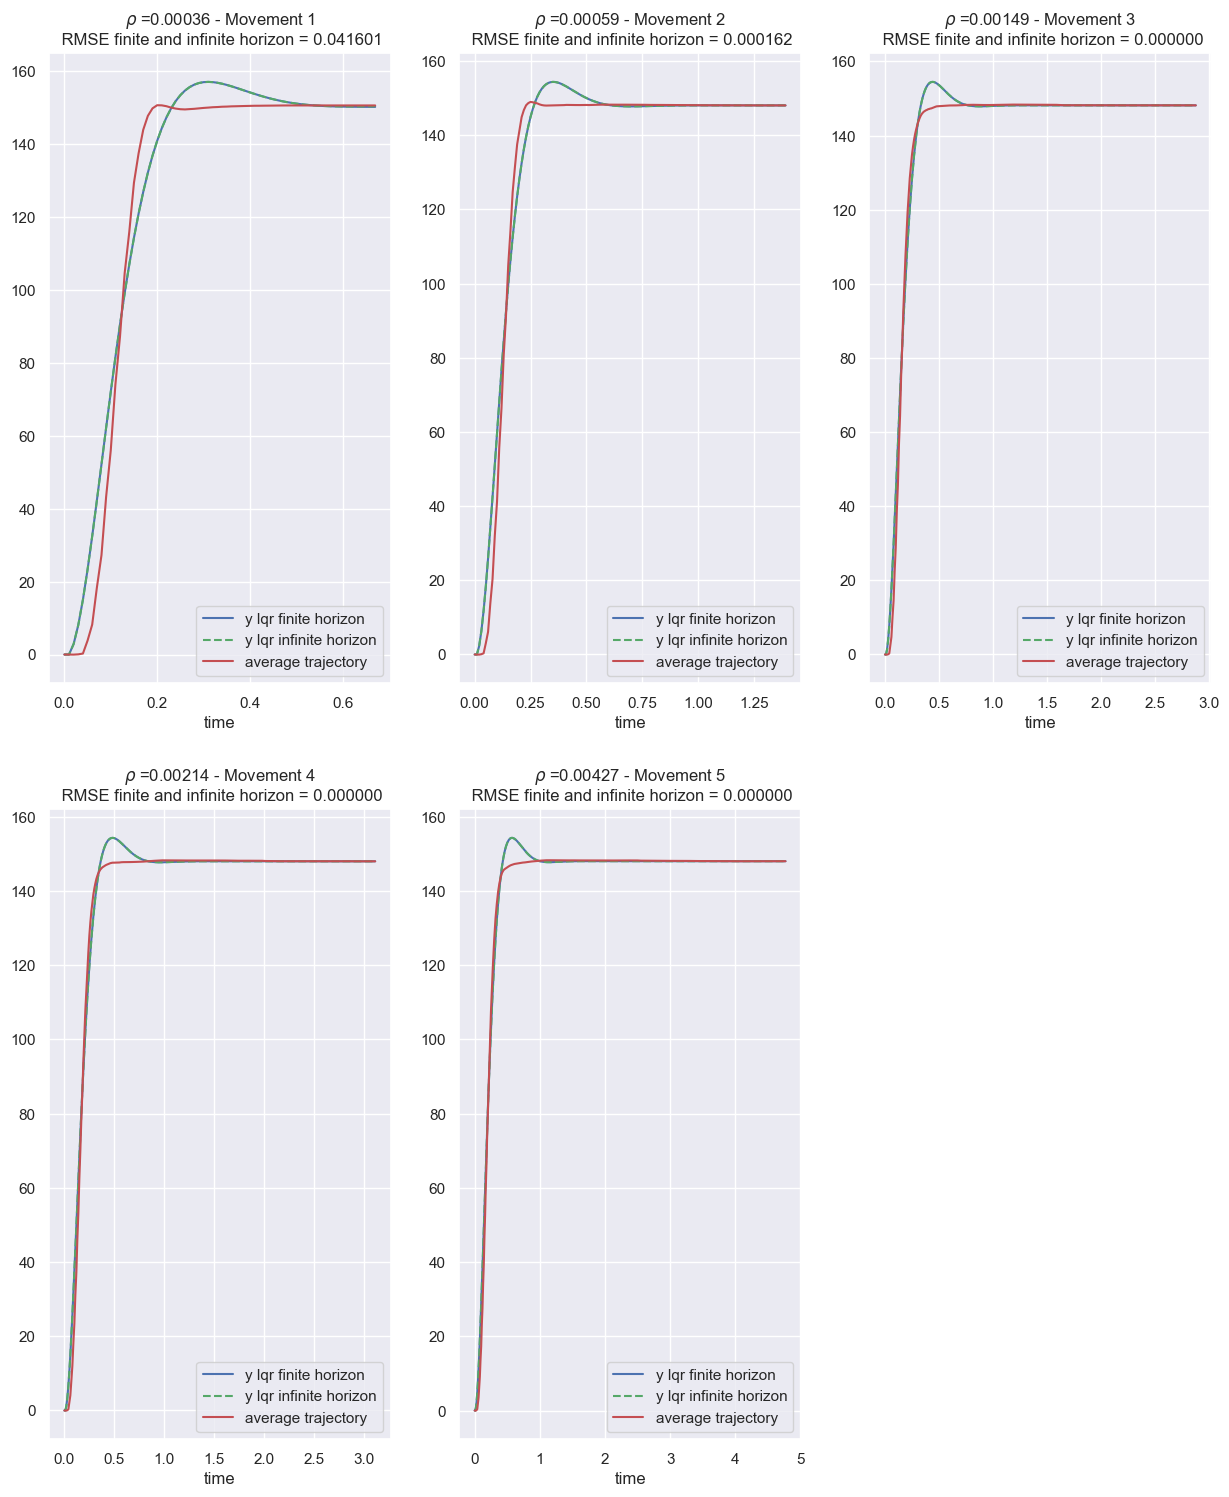

In [28]:
sns.set(rc={'figure.figsize':(15,18)})
for j in range(len(names)):
  [row, column] = np.shape(values[j])
  x_0 = np.array([average_trajectories[j][0]-average_trajectories[j][column-1],0])
  x_f = average_trajectories[j][column-1]
  rho = rho_list[j]
  R = rho * np.eye(1)
  x_0 = np.array([average_trajectories[j][0]-average_trajectories[j][column-1],0])
  _, K, _, _, y, _ = lqr(x_0, Q, R, A, B, C, column)
  _, yss, _, _, _, Pss = LQR_dare(x_0, Q, R, A, B, C, column)
  y = [float(y) for y in y]
  y = y + np.full((1, column), x_f)
  yss = [float(yss) for yss in yss]
  yss = yss + np.full((1, column), x_f)
  RMSE = sqrt(mean_squared_error(np.array(average_trajectories[j]),y[0]))
  RMSE_ss = sqrt(mean_squared_error(yss[0],y[0]))
  RMSE_text = f'{float(RMSE_ss):.6f}'
  plt.subplot(2,3,j+1) 
  time = np.arange(0,(column)*0.01,0.01)
  plt.plot(time, y[0], 'b-', label='y lqr finite horizon')
  plt.plot(time, yss[0], 'g--', label='y lqr infinite horizon')
  plt.plot(time, average_trajectories[j],'r-', label='average trajectory')
  rho_text = f'{float(rho):.5f}'
  plt.title(r'$\rho$ =' + rho_text + ' - Movement ' + str(j+1) + '\n RMSE finite and infinite horizon = ' + RMSE_text)
  plt.xlabel('time')
  plt.legend()